In [ ]:
!pip install pyclustering
!pip install yellowbrick
!pip install graphviz

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, auc, mean_squared_error
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression

# from sklearn.datasets import load_breast_cancer

import graphviz


df_wine = pd.read_csv('wine.csv')
df_wine.head()

df_penguins = pd.read_csv('penguins_modfeats_CLEAN.csv')
df_penguins.head()
# get column names

print(df_wine.columns)
print(df_penguins.columns)

Index(['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'OD280/OD315', 'proline'],
      dtype='object')
Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'species'],
      dtype='object')


In [3]:
'''

Topics covered till lab 7
read Excel file: pd.read_excel()<br>
read CSV file: pd.read_csv()<br>
rename columns: df.rename()<br>
unique values from a column: df.unique()<br>
duplicated rows: df.duplicated()<br>
drop duplicated rows: df.drop_duplicates()<br>
quantile / percentile: df.quantile()<br>
rows with NaN: df.isna()<br>
drop rows with NaN: df.dropna()<br>
determine the bin: pd.cut  
assign numerical values to different categorical data: pd.get_dummies<br>
determine data type: df.dtypes<br>
plot regression plot: sns.regplot<br>
calculate Pearson correlation: stats.pearsonr<br>

In our previous labs, the main target was to find the most meaningful features for predicting the car price. In lab 7 we will try to develop different models to predict the car price using those meaningful features. The developed model will help us to understand how these variables are used to predict the result(car price) in our case.<br> The possible meaning features in car price prediction dataset are:<br>


Details about the dataset: wine.csv

- Type of wine: 3 classes (1/2/3)
- Alcohol: a positive numerical valuebetween 0 and 100.
- Malic acid: positive numerical value.
- Ash: positive numerical value.
- Alcalinity of ash: positive numerical value.
- Magnesium: positive numerical value.
- Total phenols: positive numerical value.
- Flavanoids: positive numerical value.
- Nonflavanoid phenols: positive numerical value.
- Proanthocyanins: positive numerical value.
- Color intensity: positive numerical value.
- Hue: positive numerical value.
- OD280/OD315 of diluted wines: positive numerical value.
- Proline: positive numerical value.       

Details about the dataset: penguins_modfeats_CLEAN.csv

- This is a modified and cleaned version of the Palmers Penguin Dataset.

'''

'\n\nTopics covered till lab 7\nread Excel file: pd.read_excel()<br>\nread CSV file: pd.read_csv()<br>\nrename columns: df.rename()<br>\nunique values from a column: df.unique()<br>\nduplicated rows: df.duplicated()<br>\ndrop duplicated rows: df.drop_duplicates()<br>\nquantile / percentile: df.quantile()<br>\nrows with NaN: df.isna()<br>\ndrop rows with NaN: df.dropna()<br>\ndetermine the bin: pd.cut  \nassign numerical values to different categorical data: pd.get_dummies<br>\ndetermine data type: df.dtypes<br>\nplot regression plot: sns.regplot<br>\ncalculate Pearson correlation: stats.pearsonr<br>\n\nIn our previous labs, the main target was to find the most meaningful features for predicting the car price. In lab 7 we will try to develop different models to predict the car price using those meaningful features. The developed model will help us to understand how these variables are used to predict the result(car price) in our case.<br> The possible meaning features in car price predi

In [14]:
# Q1

df_wine = df_wine.dropna()

df_wine = df_wine[(df_wine['alcohol'] >= 0) & (df_wine['alcohol'] <= 100)]
df_wine = df_wine[(df_wine['malic_acid'] >= 0)]
df_wine = df_wine[(df_wine['ash'] >= 0)]
df_wine = df_wine[(df_wine['alcalinity_of_ash'] >= 0)]
df_wine = df_wine[(df_wine['magnesium'] >= 0)]
df_wine = df_wine[(df_wine['total_phenols'] >= 0)]
df_wine = df_wine[(df_wine['flavanoids'] >= 0)]
df_wine = df_wine[(df_wine['nonflavanoid_phenols'] >= 0)]
df_wine = df_wine[(df_wine['proanthocyanins'] >= 0)]
df_wine = df_wine[(df_wine['color_intensity'] >= 0)]
df_wine = df_wine[(df_wine['hue'] >= 0)]
df_wine = df_wine[(df_wine['OD280/OD315'] >= 0)]
df_wine = df_wine[(df_wine['proline'] >= 0)]



In [15]:
correlation = df_wine['alcohol'].corr(df_wine['magnesium'])
print("Moderate negative: Yes" if -0.5 < correlation < -0.3 else "Moderate negative: No")

correlation = df_wine['flavanoids'].corr(df_wine['hue'])
print("Moderate positive: Yes" if 0.3 < correlation < 0.5 else "Moderate positive: No")

correlation = df_wine['alcohol'].corr(df_wine['magnesium'])
print("Strong positive: Yes" if correlation > 0.5 else "Strong positive: No")

correlation = df_wine['flavanoids'].corr(df_wine['alcohol'])
print("Weak negative: Yes" if 0 < correlation < 0.3 else "Weak negative: No")

correlation = df_wine['flavanoids'].corr(df_wine['hue'])
print("Weak positive: Yes" if 0 < correlation < 0.3 else "Weak positive: No")

correlation = df_wine['alcohol'].corr(df_wine['magnesium'])
print("Moderate positive: Yes" if 0.3 < correlation < 0.5 else "Moderate positive: No")


Moderate negative: No
Moderate positive: No
Strong positive: No
Weak negative: Yes
Weak positive: No
Moderate positive: Yes


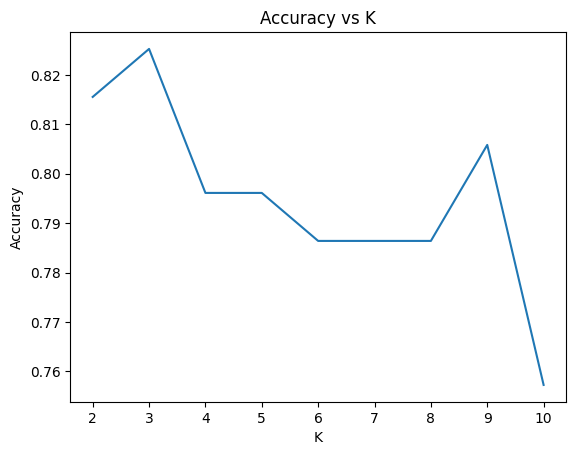

Optimal K: 3


In [16]:
# Q2
df_penguins = pd.read_csv('penguins_modfeats_CLEAN.csv')
df_penguins = df_penguins.dropna()

X = df_penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = df_penguins['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k_values = range(2, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.show()

print("Optimal K:", k_values[np.argmax(accuracies)])


In [18]:
# Q3
df_penguins = pd.read_csv('penguins_modfeats_CLEAN.csv')
df_penguins = df_penguins.dropna()

X = df_penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = df_penguins['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

body_measurements = [[50.6, 16.6, 193, 4050]]
species = dt.predict(body_measurements)

print("Predicted species:", species[0])


Predicted species: Chinstrap


C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [19]:
# Q5
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
accuracy_linear = accuracy_score(y_test, svm_linear.predict(X_test))

svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
accuracy_sigmoid = accuracy_score(y_test, svm_sigmoid.predict(X_test))

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
accuracy_rbf = accuracy_score(y_test, svm_rbf.predict(X_test))

print("Linear:", accuracy_linear)
print("Sigmoid:", accuracy_sigmoid)
print("RBF:", accuracy_rbf)

if accuracy_linear < accuracy_sigmoid and accuracy_linear < accuracy_rbf:
    print("Worst: Linear")
elif accuracy_sigmoid < accuracy_linear and accuracy_sigmoid < accuracy_rbf:
    print("Worst: Sigmoid")
else:
    print("Worst: RBF")


Linear: 0.9777777777777777
Sigmoid: 0.8666666666666667
RBF: 1.0
Worst: Sigmoid
